In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import xesmf as xe

In [6]:
filepath="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/europe-2013-sarah3-era5/europe-2013-sarah3-era5.nc"
ds=xr.open_dataset(filepath,decode_times=True, use_cftime=True)
ds

/tmp/ipykernel_81318/1612586324.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds=xr.open_dataset(filepath,decode_times=True, use_cftime=True)


<xarray.Dataset> Size: 13GB
Dimensions:           (x: 177, y: 131, time: 8760)
Coordinates:
  * x                 (x) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 40.2 40.5 40.8
  * y                 (y) float64 1kB 33.0 33.3 33.6 33.9 ... 71.4 71.7 72.0
  * time              (time) object 70kB 2013-01-01 00:00:00 ... 2013-12-31 2...
    lon               (x) float64 1kB ...
    lat               (y) float64 1kB ...
Data variables: (12/13)
    influx_direct     (time, y, x) float32 812MB ...
    influx_diffuse    (time, y, x) float32 812MB ...
    solar_altitude    (time, y, x) float64 2GB ...
    solar_azimuth     (time, y, x) float64 2GB ...
    height            (y, x) float32 93kB ...
    wnd100m           (time, y, x) float32 812MB ...
    ...                ...
    roughness         (time, y, x) float32 812MB ...
    influx_toa        (time, y, x) float32 812MB ...
    albedo            (time, y, x) float32 812MB ...
    temperature       (time, y, x) float64 2GB ...
    soil temperature  (time, y, x) float64 2GB ...
    runoff            (time, y, x) float32 812MB ...
Attributes: (12/46)
    module:                     ['era5', 'sarah']
    prepared_features:          ['height', 'influx', 'runoff', 'temperature',...
    chunksize_lat:              -1
    chunksize_time:             100
    sarah_dir:                  data
    dx:                         0.3
    ...                         ...
    instrument:                 SEVIRI > Spinning Enhanced Visible and Infrar...
    variable_id:                SIS
    license:                    The CM SAF data are owned by EUMETSAT and are...
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...
    history:                    2022-07-09 17:18:34 GMT by grib_to_netcdf-2.2...

In [7]:
cutout = atlite.Cutout(
    path="europe-2013",
    module=["era5"],
    x=slice(-12, 40.8),
    y=slice(33,72),
    time="2013",
    chunks={"time": 100},
)
cutout

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/atlite/cutout.py:156: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


<Cutout "europe-2013">
 x = -12.00 ⟷ 40.75, dx = 0.25
 y = 33.00 ⟷ 72.00, dy = 0.25
 time = 2013-01-01 ⟷ 2013-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [8]:
cutout.prepare()

INFO:atlite.data:Cutout already prepared.


<Cutout "europe-2013">
 x = -12.00 ⟷ 40.75, dx = 0.25
 y = 33.00 ⟷ 72.00, dy = 0.25
 time = 2013-01-01 ⟷ 2013-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [9]:
cutout.data

<xarray.Dataset> Size: 20GB
Dimensions:               (x: 212, y: 157, time: 8760)
Coordinates:
  * x                     (x) float64 2kB -12.0 -11.75 -11.5 ... 40.5 40.75
  * y                     (y) float64 1kB 33.0 33.25 33.5 ... 71.5 71.75 72.0
  * time                  (time) datetime64[ns] 70kB 2013-01-01 ... 2013-12-3...
    lon                   (x) float64 2kB dask.array<chunksize=(212,), meta=np.ndarray>
    lat                   (y) float64 1kB dask.array<chunksize=(157,), meta=np.ndarray>
Data variables: (12/15)
    height                (y, x) float32 133kB dask.array<chunksize=(157, 212), meta=np.ndarray>
    wnd100m               (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float64 2GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    roughness             (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    influx_toa            (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    ...                    ...
    solar_altitude        (time, y, x) float64 2GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    solar_azimuth         (time, y, x) float64 2GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    temperature           (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    soil temperature      (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    dewpoint temperature  (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
    runoff                (time, y, x) float32 1GB dask.array<chunksize=(100, 157, 212), meta=np.ndarray>
Attributes:
    module:                  era5
    prepared_features:       ['runoff', 'temperature', 'height', 'wind', 'inf...
    chunksize_time:          100
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-07T15:04 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
rsds_sarah=ds['influx_direct'] #direct irradiance from sarah
rsdsdiff_sarah=ds['influx_diffuse'] #diffuese rad from sarah
tas_sarah=ds['temperature'] #temperature from sarah

In [11]:
rsds_era5=cutout.data['influx_direct'] #direct irradiance from era5
rsdsdiff_era5=cutout.data['influx_diffuse'] #diffuse rad from era5
tas_era5=cutout.data['temperature'] #temperature from era5

In [12]:
avg_rsds_sarah=rsds_sarah.mean(dim='time')
avg_rsdsdiff_sarah=rsdsdiff_sarah.mean(dim='time')
avg_tas_sarah=tas_sarah.mean(dim='time')

In [13]:
avg_rsds_era5=rsds_era5.mean(dim='time')
avg_rsdsdiff_era5=rsdsdiff_era5.mean(dim='time')
avg_tas_era5=tas_era5.mean(dim='time')

In [14]:
# Fill NaN values by interpolating over both x and y dimensions
avg_rsds_sarah_filled = avg_rsds_sarah.ffill(dim='x').bfill(dim='x')
avg_rsds_sarah_filled = avg_rsds_sarah_filled.ffill(dim='y').bfill(dim='y')

avg_rsdsdiff_sarah_filled = avg_rsdsdiff_sarah.ffill(dim='x').bfill(dim='x')
avg_rsdsdiff_sarah_filled = avg_rsdsdiff_sarah_filled.ffill(dim='y').bfill(dim='y')


avg_tas_sarah_filled = avg_tas_sarah.interpolate_na(dim='x', method='nearest')
avg_tas_sarah_filled = avg_tas_sarah_filled.interpolate_na(dim='y', method='nearest')

In [15]:
# Ensure x and y are single chunks
avg_rsds_era5 = avg_rsds_era5.chunk({'x': -1, 'y': -1})

# Now apply interpolation
avg_rsds_era5_filled = avg_rsds_era5.interpolate_na(dim='x', method='nearest')
avg_rsds_era5_filled = avg_rsds_era5_filled.interpolate_na(dim='y', method='nearest')

avg_rsdsdiff_era5 = avg_rsdsdiff_era5.chunk({'x': -1, 'y': -1})
avg_rsdsdiff_era5_filled = avg_rsdsdiff_era5.interpolate_na(dim='x', method='nearest')
avg_rsdsdiff_era5_filled = avg_rsdsdiff_era5_filled.interpolate_na(dim='y', method='nearest')

avg_tas_era5 = avg_tas_era5.chunk({'x': -1, 'y': -1})
avg_tas_era5_filled = avg_tas_era5.interpolate_na(dim='x', method='nearest')
avg_tas_era5_filled = avg_tas_era5_filled.interpolate_na(dim='y', method='nearest')

In [16]:
from regrid_fctn import regrid
regridder=regrid(avg_rsds_era5_filled, avg_rsds_sarah_filled, method='conservative')

ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

In [49]:
lon = ds['lon']
lat = ds['lat']

In [32]:
avg_rsds=rsds.mean(dim='time')
avg_rsdsdiff=rsdsdiff.mean(dim='time')
avg_tas=tas.mean(dim='time')
#max_avg_rsds = avg_rsds.max(dim='time')
#min_avg_rsds=rsds.min(dim='time')
#print(min_avg_rsds)
avg_rsds

<xarray.DataArray 'influx_direct' (y: 131, x: 177)> Size: 93kB
array([[133.08572, 134.36247, 136.3966 , ..., 162.27309, 162.20668,
              nan],
       [130.1587 , 131.98056, 134.40018, ..., 160.90501, 160.087  ,
              nan],
       [127.04215, 129.30148, 131.69016, ..., 160.6895 , 159.3413 ,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], shape=(131, 177), dtype=float32)
Coordinates:
  * x        (x) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 39.9 40.2 40.5 40.8
  * y        (y) float64 1kB 33.0 33.3 33.6 33.9 34.2 ... 71.1 71.4 71.7 72.0
    lon      (x) float64 1kB ...
    lat      (y) float64 1kB ...

In [35]:
# Create a mask for the NaN values using .isnull()
nan_mask = avg_rsds.isnull()

# For each step, replace NaNs with the previous valid value
for t in range(1, len(avg_rsds)):  # Start from the second element to avoid index error
    # Replace NaN values with the previous non-NaN value
    avg_rsds[t] = avg_rsds[t].where(~nan_mask[t], avg_rsds[t-1])

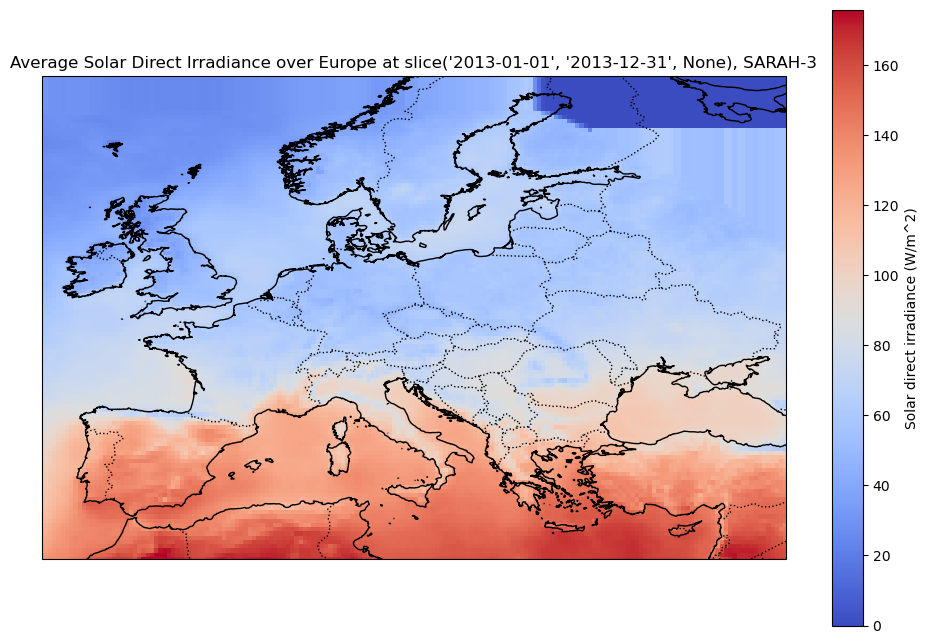

In [50]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
avg_rsds.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context

ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])

# Add title and labels
plt.title(f'Average Solar Direct Irradiance over Europe at {time_range}, SARAH-3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



In [52]:
lat_max_sarah=lat.max()

In [43]:
filename_model="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_2013.nc"
ds_model=xr.open_dataset(filename_model,decode_times=True, use_cftime=True)

/tmp/ipykernel_99346/3550082239.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_model=xr.open_dataset(filename_model,decode_times=True, use_cftime=True)


In [57]:
ds_model

<xarray.Dataset> Size: 20MB
Dimensions:   (time: 2920, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 23kB 2013-01-01 01:30:00 ... 2013-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 7MB ...
    rsdsdiff  (time, lat, lon) float32 7MB ...
    tas       (time, lat, lon) float32 7MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   03/03/2025 14:14

In [62]:
rsds_model=ds_model['rsds']
avg_rsds_model=rsds_model.mean(dim='time')

In [63]:
# Create a mask for the NaN values using .isnull()
nan_mask = avg_rsds_model.isnull()

# For each step, replace NaNs with the previous valid value
for t in range(1, len(avg_rsds_model)):  # Start from the second element to avoid index error
    # Replace NaN values with the previous non-NaN value
    avg_rsds_model[t] = avg_rsds_model[t].where(~nan_mask[t], avg_rsds_model[t-1])

In [64]:
lat_max_model=ds_model['lat'].max()
print(lat_max_model)

<xarray.DataArray 'lat' ()> Size: 8B
array(73.9475174)


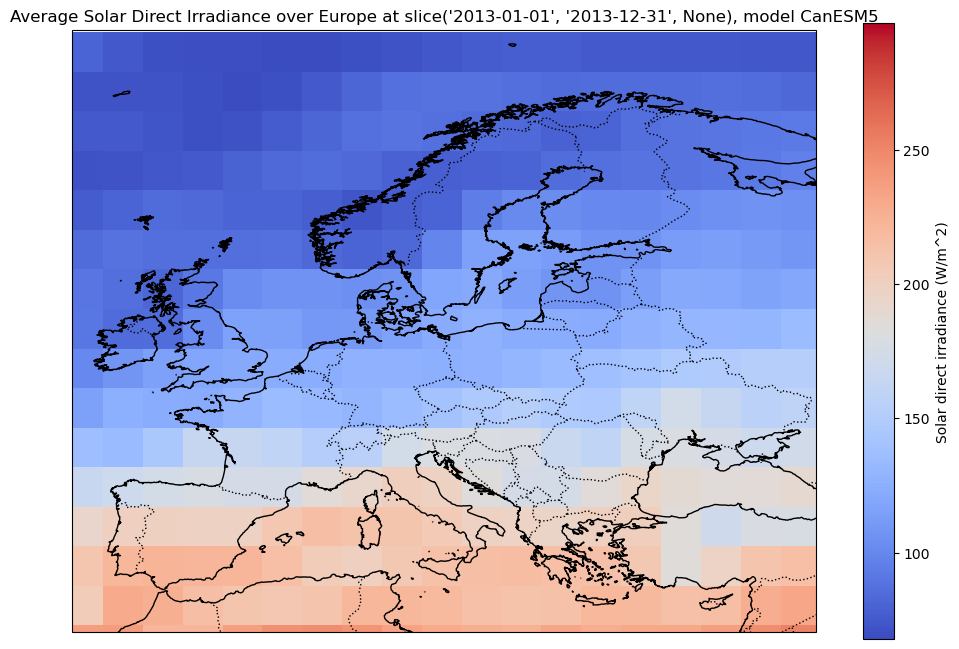

In [65]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
avg_rsds_model.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context

ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([lon.min(), lon.max(), lat.min(), lat_max_model])

# Add title and labels
plt.title(f'Average Solar Direct Irradiance over Europe at {time_range}, model CanESM5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [84]:
rsds_model=ds_model['rsds']
rsds_sarah=ds['influx_direct']
rsds_model
rsds_sarah

<xarray.DataArray 'influx_direct' (time: 8760, y: 131, x: 177)> Size: 812MB
array([[[ 0.,  0., ...,  0., nan],
        [ 0.,  0., ...,  0., nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0., nan],
        [ 0.,  0., ...,  0., nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[ 0.,  0., ...,  0., nan],
        [ 0.,  0., ...,  0., nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0., nan],
        [ 0.,  0., ...,  0., nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], shape=(8760, 131, 177), dtype=float32)
Coordinates:
  * x        (x) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 39.9 40.2 40.5 40.8
  * y        (y) float64 1kB 33.0 33.3 33.6 33.9 34.2 ... 71.1 71.4 71.7 72.0
  * time     (time) object 70kB 2013-01-01 00:00:00 ... 2013-12-31 23:00:00
    lon      (x) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 39.9 40.2 40.5 nan
    lat      (y) float64 1kB 33.0 33.3 33.6 33.9 34.2 ... nan nan nan nan nan
Attributes:
    module:   sarah
    feature:  influx

In [83]:
rsds_sarah_resampled = rsds_sarah.interp_like(rsds_model)
rsds_bias = rsds_sarah_resampled - rsds_model

# Convert Dask array to Numpy for `np.max()`
bias_max = rsds_bias.compute().max()
bias_min = -bias_max  # Keep the color scale symmetric

# Create the plot with an improved colormap
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Use a diverging colormap where strong deviations are strongly colored
rsds_bias.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Reversed Red-Blue for clear interpretation
    center=0,       # Ensures white is at zero difference
    vmin=bias_min,  # Symmetric limits
    vmax=bias_max,
    cbar_kwargs={'label': 'Direct Irradiance Bias (ESGF CanESM5 - SARAH) [W/m2]'}
)

# Improve map details
ax.set_title(f"Direct Solar Irradiance bias during {time_range},SARAH - model CanESM5")
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Show the plot
plt.show()

MemoryError: Unable to allocate 141. GiB for an array with shape (2920, 131, 177, 20, 28) and data type float32

In [ ]:
avg_rsds_model.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context

ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([lon.min(), lon.max(), lat.min(), lat_max_model])

# Add title and labels
plt.title(f'Average Solar Direct Irradiance over Europe at {time_range}, model CanESM5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [ ]:
# Flatten values for statistical analysis
rsds_model = rsds_model.values.flatten()
rsds_sarah = rsds_sarah.values.flatten()

In [ ]:
import pandas as pd
# Function to compute key statistics
def compute_stats(values, label):
    return {
        "Dataset": label,
        "Mean (W/m2)": np.mean(values),
        "Median (W/m2)": np.median(values),
        "Standard Deviation (W/m2)": np.std(values),
        "Min (W/m2)": np.min(values),
        "Max (W/m2)": np.max(values)
    }
stats_model=compute_stats(rsds_model, "Model CanESM5")
stats_sarah=compute_stats(rsds_sarah, "SARAH-3")

# Convert to DataFrame for easier visualization
df_stats = pd.DataFrame([stats_model, stats_model])
print(df_stats)

In [ ]:
# Remove NaNs
rsds_model = rsds_model[~np.isnan(rsds_model)]
rsds_sarah = rsds_sarah[~np.isnan(rsds_sarah)]